In [39]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [40]:
data = pd.read_csv('../quality_check_measurements.csv')
data = data.drop(columns=['runName']).transpose()
data

,0
0,617
1,320
2,386
3,342
4,347
...,...
95,333
96,335
97,321
98,330


## 01: Boxplot und Lageparameter

In [41]:
data1 = data

In [60]:
# Lageparameter sind hier zu entnehmen
data1.describe()

,0
count,100.000000
mean,323.160000
std,32.513469
min,302.000000
25%,309.750000
50%,321.000000
75%,329.000000
max,617.000000


durchschnittliche Laufzeit (ms)


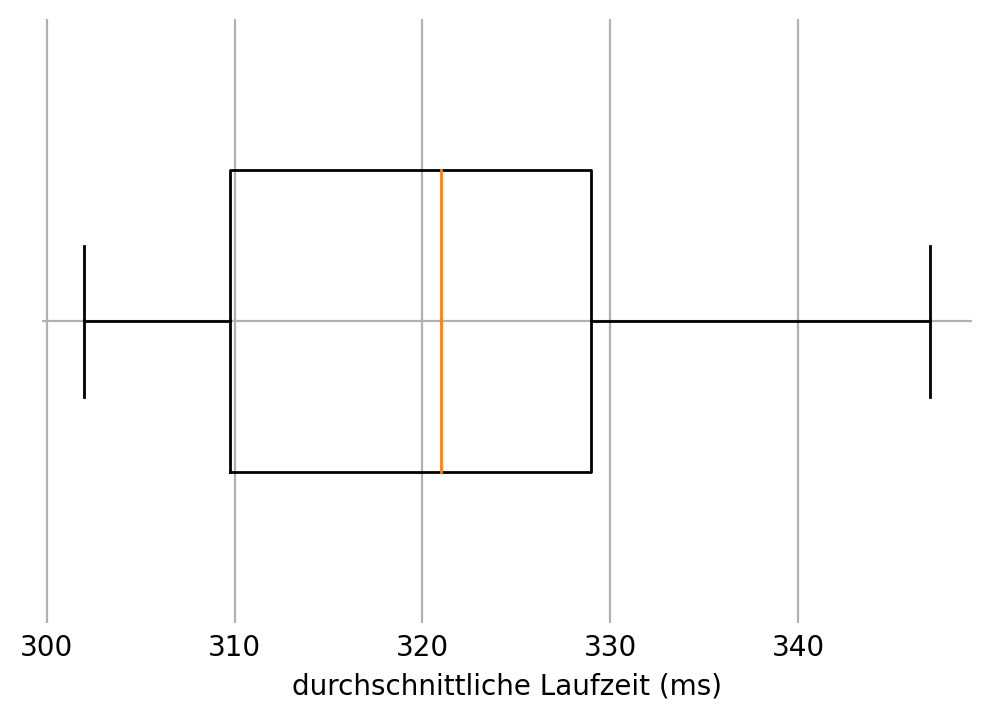

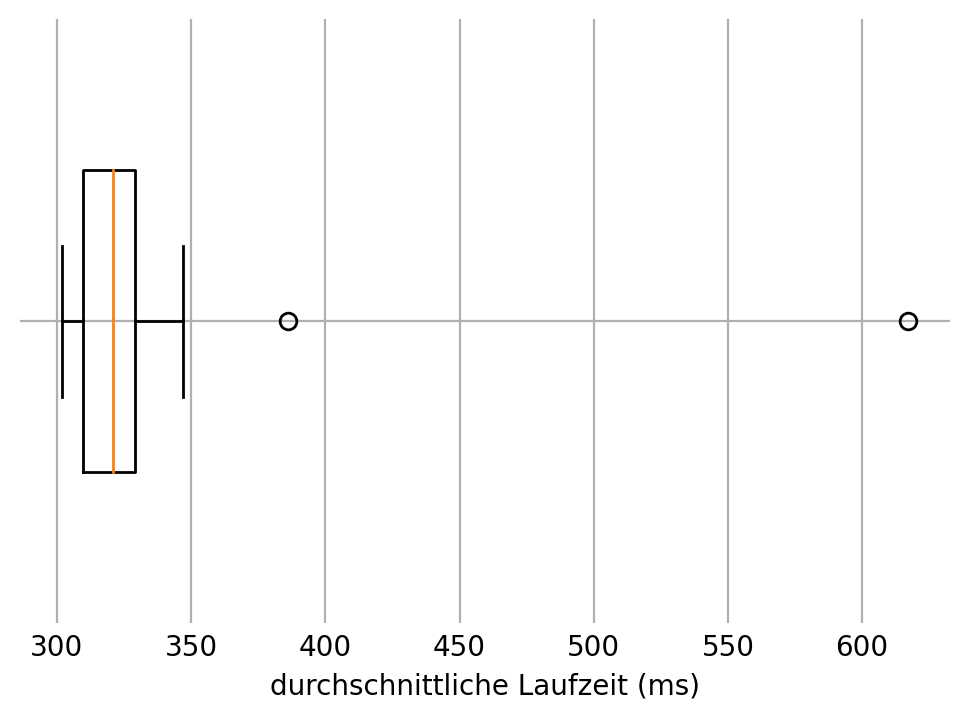

In [58]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
fig1, ax1 = plt.subplots(figsize=(6,4), dpi=200)

# TODO: gucken wie extrem die ausreißer sind bei showfliers -> Eigendlich ganz sinnvoll
boxplot = ax.boxplot(data1, notch=False, showfliers=False, patch_artist=False, vert=False ,widths=0.5, labels=[""])
boxplot_with_fliers = ax1.boxplot(data1, notch=False, showfliers=True, patch_artist=False, vert=False ,widths=0.5, labels=[""])

ax.set(xlabel='durchschnittliche Laufzeit (ms)')
ax1.set(xlabel='durchschnittliche Laufzeit (ms)')

print(ax.get_xlabel())
ax.grid()
ax1.grid()

for spine in ax.spines.values():
    spine.set_visible(False)

for spine in ax1.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', length=0)
ax1.tick_params(axis='both', length=0)

fig.savefig('quality_check_boxplot.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')
fig1.savefig('quality_check_boxplot_with_fliers.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

## 02:

In [61]:
data2 = data

(array([15.,  7., 16.,  5.,  2.,  3., 11., 11., 12.,  6.,  4.,  1.,  3.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([302.  , 305.15, 308.3 , 311.45, 314.6 , 317.75, 320.9 , 324.05,
        327.2 , 330.35, 333.5 , 336.65, 339.8 , 342.95, 346.1 , 349.25,
        352.4 , 355.55, 358.7 , 361.85, 365.  , 368.15, 371.3 , 374.45,
        377.6 , 380.75, 383.9 , 387.05, 390.2 , 393.35, 396.5 , 399.65,
        402.8 , 405.95, 409.1 , 412.25, 415.4 , 418.55, 421.7 , 424.85,
        428.  , 431.15, 434.3 , 437.45, 440.6 , 443.75, 446.9 , 450.05,
  

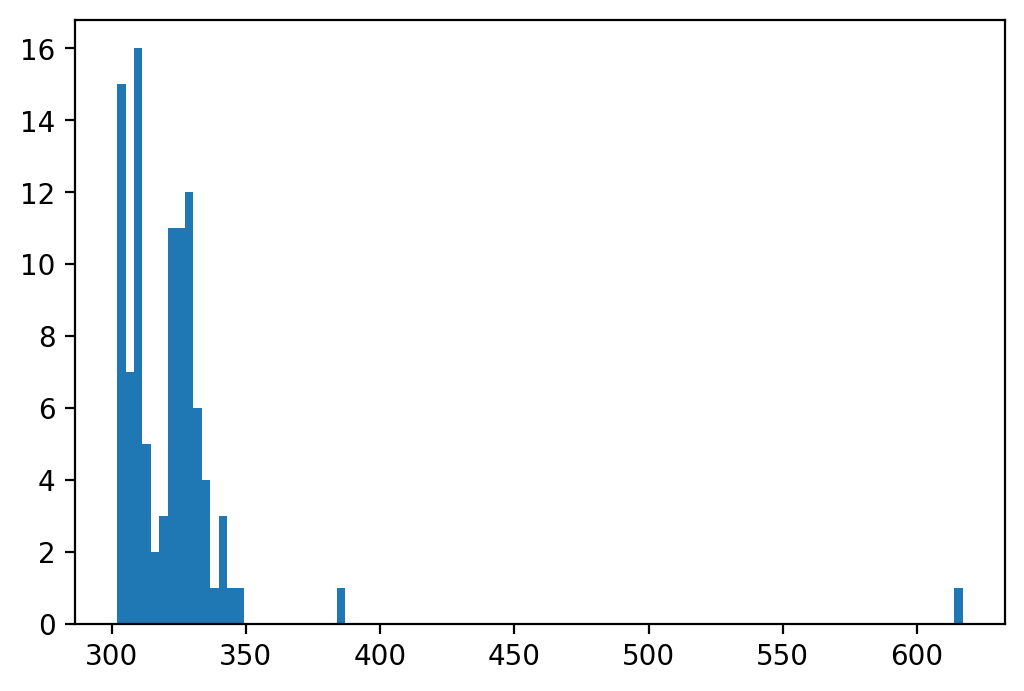

In [68]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
ax.hist(data2, bins=100)